In [11]:
import json
import pyspark as ps
from pyspark.sql.types import *
from pyspark.sql.functions import udf, col, when
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline

%load_ext autoreload
%autoreload 2
from src.datadict import dd_to_structure, ageGrouping
from src.quick_look import ql, quick_plot

plt.rcParams['figure.figsize'] = [30, 15]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("Capstone 1") \
            .config("spark.sql.caseSensitive", "true")\
            .getOrCreate()
sc = spark.sparkContext

In [14]:
tmp_df = spark.read.text('data/apr21pub.dat')
apr21_df = tmp_df.select(tmp_df.value.substr( 1, 15).alias('HRHHID'), tmp_df.value.substr(16,  2).alias('HRMONTH'), tmp_df.value.substr(18,  4).alias('HRYEAR4'), tmp_df.value.substr(22,  2).alias('HURESPLI'), tmp_df.value.substr(24,  3).alias('HUFINAL'), tmp_df.value.substr(27,  2).alias('FILLER27'), tmp_df.value.substr(29,  2).alias('HETENURE'), tmp_df.value.substr(31,  2).alias('HEHOUSUT'), tmp_df.value.substr(33,  2).alias('HETELHHD'), tmp_df.value.substr(35,  2).alias('HETELAVL'), tmp_df.value.substr(37,  2).alias('HEPHONEO'), tmp_df.value.substr(39,  2).alias('HEFAMINC'), tmp_df.value.substr(41,  2).alias('HUTYPEA'), tmp_df.value.substr(43,  2).alias('HUTYPB'), tmp_df.value.substr(45,  2).alias('HUTYPC'), tmp_df.value.substr(47, 10).alias('HWHHWGT'), tmp_df.value.substr(57,  2).alias('HRINTSTA'), tmp_df.value.substr(59,  2).alias('HRNUMHOU'), tmp_df.value.substr(61,  2).alias('HRHTYPE'), tmp_df.value.substr(63,  2).alias('HRMIS'), tmp_df.value.substr(65,  2).alias('HUINTTYP'), tmp_df.value.substr(67,  2).alias('HUPRSCNT'), tmp_df.value.substr(69,  2).alias('HRLONGLK'), tmp_df.value.substr(71,  5).alias('HRHHID2'), tmp_df.value.substr(76,  2).alias('HWHHWTLN'), tmp_df.value.substr(78,  1).alias('FILLER78'), tmp_df.value.substr(79,  2).alias('HUBUS'), tmp_df.value.substr(81,  2).alias('HUBUSL1'), tmp_df.value.substr(83,  2).alias('HUBUSL2'), tmp_df.value.substr(85,  2).alias('HUBUSL3'), tmp_df.value.substr(87,  2).alias('HUBUSL4'), tmp_df.value.substr(89,  2).alias('GEREG'), tmp_df.value.substr(91,  1).alias('GEDIV'), tmp_df.value.substr(92,  1).alias('FILLER92'), tmp_df.value.substr(93,  2).alias('GESTFIPS'), tmp_df.value.substr(95,  1).alias('FILLER95'), tmp_df.value.substr(96,  5).alias('GTCBSA'), tmp_df.value.substr(101,  3).alias('GTCO'), tmp_df.value.substr(104,  1).alias('GTCBSAST'), tmp_df.value.substr(105,  1).alias('GTMETSTA'), tmp_df.value.substr(106,  1).alias('GTINDVPC'), tmp_df.value.substr(107,  1).alias('GTCBSASZ'), tmp_df.value.substr(108,  3).alias('GTCSA'), tmp_df.value.substr(111,  3).alias('FILLER111'), tmp_df.value.substr(114,  2).alias('FILLER114'), tmp_df.value.substr(118,  2).alias('PERRP'), tmp_df.value.substr(120,  2).alias('FILLER120'), tmp_df.value.substr(122,  2).alias('PRTAGE'), tmp_df.value.substr(124,  1).alias('PRTFAGE'), tmp_df.value.substr(125,  2).alias('PEMARITL'), tmp_df.value.substr(127,  2).alias('PESPOUSE'), tmp_df.value.substr(129,  2).alias('PESEX'), tmp_df.value.substr(131,  2).alias('PEAFEVER'), tmp_df.value.substr(133,  2).alias('FILLER133'), tmp_df.value.substr(135,  2).alias('PEAFNOW'), tmp_df.value.substr(137,  2).alias('PEEDUCA'), tmp_df.value.substr(139,  2).alias('PTDTRACE'), tmp_df.value.substr(141,  2).alias('PRDTHSP'), tmp_df.value.substr(143,  2).alias('PUCHINHH'), tmp_df.value.substr(145,  2).alias('FILLER145'), tmp_df.value.substr(147,  2).alias('PULINENO'), tmp_df.value.substr(149,  2).alias('FILLER149'), tmp_df.value.substr(151,  2).alias('PRFAMNUM'), tmp_df.value.substr(153,  2).alias('PRFAMREL'), tmp_df.value.substr(155,  2).alias('PRFAMTYP'), tmp_df.value.substr(157,  2).alias('PEHSPNON'), tmp_df.value.substr(159,  2).alias('PRMARSTA'), tmp_df.value.substr(161,  2).alias('PRPERTYP'), tmp_df.value.substr(163,  3).alias('PENATVTY'), tmp_df.value.substr(166,  3).alias('PEMNTVTY'), tmp_df.value.substr(169,  3).alias('PEFNTVTY'), tmp_df.value.substr(172,  2).alias('PRCITSHP'), tmp_df.value.substr(174,  2).alias('PRCITFLG'), tmp_df.value.substr(176,  2).alias('PRINUSYR'), tmp_df.value.substr(178,  2).alias('PUSLFPRX'), tmp_df.value.substr(180,  2).alias('PEMLR'), tmp_df.value.substr(182,  2).alias('PUWK'), tmp_df.value.substr(184,  2).alias('PUBUS1'), tmp_df.value.substr(186,  2).alias('PUBUS2OT'), tmp_df.value.substr(188,  2).alias('PUBUSCK1'), tmp_df.value.substr(190,  2).alias('PUBUSCK2'), tmp_df.value.substr(192,  2).alias('PUBUSCK3'), tmp_df.value.substr(194,  2).alias('PUBUSCK4'), tmp_df.value.substr(196,  2).alias('PURETOT'), tmp_df.value.substr(198,  2).alias('PUDIS'), tmp_df.value.substr(200,  2).alias('PERET1'), tmp_df.value.substr(202,  2).alias('PUDIS1'), tmp_df.value.substr(204,  2).alias('PUDIS2'), tmp_df.value.substr(206,  2).alias('PUABSOT'), tmp_df.value.substr(208,  2).alias('PULAY'), tmp_df.value.substr(210,  2).alias('PEABSRSN'), tmp_df.value.substr(212,  2).alias('PEABSPDO'), tmp_df.value.substr(214,  2).alias('PEMJOT'), tmp_df.value.substr(216,  2).alias('PEMJNUM'), tmp_df.value.substr(218,  2).alias('PEHRUSL1'), tmp_df.value.substr(220,  2).alias('PEHRUSL2'), tmp_df.value.substr(222,  2).alias('PEHRFTPT'), tmp_df.value.substr(224,  3).alias('PEHRUSLT'), tmp_df.value.substr(227,  2).alias('PEHRWANT'), tmp_df.value.substr(229,  2).alias('PEHRRSN1'), tmp_df.value.substr(231,  2).alias('PEHRRSN2'), tmp_df.value.substr(233,  2).alias('PEHRRSN3'), tmp_df.value.substr(235,  2).alias('PUHROFF1'), tmp_df.value.substr(237,  2).alias('PUHROFF2'), tmp_df.value.substr(239,  2).alias('PUHROT1'), tmp_df.value.substr(241,  2).alias('PUHROT2'), tmp_df.value.substr(243,  2).alias('PEHRACT1'), tmp_df.value.substr(245,  2).alias('PEHRACT2'), tmp_df.value.substr(247,  3).alias('PEHRACTT'), tmp_df.value.substr(250,  2).alias('PEHRAVL'), tmp_df.value.substr(252,  5).alias('FILLER252'), tmp_df.value.substr(257,  2).alias('PUHRCK1'), tmp_df.value.substr(259,  2).alias('PUHRCK2'), tmp_df.value.substr(261,  2).alias('PUHRCK3'), tmp_df.value.substr(263,  2).alias('PUHRCK4'), tmp_df.value.substr(265,  2).alias('PUHRCK5'), tmp_df.value.substr(267,  2).alias('PUHRCK6'), tmp_df.value.substr(269,  2).alias('PUHRCK7'), tmp_df.value.substr(271,  2).alias('PUHRCK12'), tmp_df.value.substr(273,  2).alias('PULAYDT'), tmp_df.value.substr(275,  2).alias('PULAY6M'), tmp_df.value.substr(277,  2).alias('PELAYAVL'), tmp_df.value.substr(279,  2).alias('PULAYAVR'), tmp_df.value.substr(281,  2).alias('PELAYLK'), tmp_df.value.substr(283,  3).alias('PELAYDUR'), tmp_df.value.substr(286,  2).alias('PELAYFTO'), tmp_df.value.substr(288,  2).alias('PULAYCK1'), tmp_df.value.substr(290,  2).alias('PULAYCK2'), tmp_df.value.substr(292,  2).alias('PULAYCK3'), tmp_df.value.substr(294,  2).alias('PULK'), tmp_df.value.substr(296,  2).alias('PELKM1'), tmp_df.value.substr(298,  2).alias('PULKM2'), tmp_df.value.substr(300,  2).alias('PULKM3'), tmp_df.value.substr(302,  2).alias('PULKM4'), tmp_df.value.substr(304,  2).alias('PULKM5'), tmp_df.value.substr(306,  2).alias('PULKM6'), tmp_df.value.substr(308,  2).alias('PULKDK1'), tmp_df.value.substr(310,  2).alias('PULKDK2'), tmp_df.value.substr(312,  2).alias('PULKDK3'), tmp_df.value.substr(314,  2).alias('PULKDK4'), tmp_df.value.substr(316,  2).alias('PULKDK5'), tmp_df.value.substr(318,  2).alias('PULKDK6'), tmp_df.value.substr(320,  2).alias('PULKPS1'), tmp_df.value.substr(322,  2).alias('PULKPS2'), tmp_df.value.substr(324,  2).alias('PULKPS3'), tmp_df.value.substr(326,  2).alias('PULKPS4'), tmp_df.value.substr(328,  2).alias('PULKPS5'), tmp_df.value.substr(330,  2).alias('PULKPS6'), tmp_df.value.substr(332,  2).alias('PELKAVL'), tmp_df.value.substr(334,  2).alias('PULKAVR'), tmp_df.value.substr(336,  2).alias('PELKLL1O'), tmp_df.value.substr(338,  2).alias('PELKLL2O'), tmp_df.value.substr(340,  2).alias('PELKLWO'), tmp_df.value.substr(342,  3).alias('PELKDUR'), tmp_df.value.substr(345,  2).alias('PELKFTO'), tmp_df.value.substr(347,  2).alias('PEDWWNTO'), tmp_df.value.substr(349,  2).alias('PEDWRSN'), tmp_df.value.substr(351,  2).alias('PEDWLKO'), tmp_df.value.substr(353,  2).alias('PEDWWK'), tmp_df.value.substr(355,  2).alias('PEDW4WK'), tmp_df.value.substr(357,  2).alias('PEDWLKWK'), tmp_df.value.substr(359,  2).alias('PEDWAVL'), tmp_df.value.substr(361,  2).alias('PEDWAVR'), tmp_df.value.substr(363,  2).alias('PUDWCK1'), tmp_df.value.substr(365,  2).alias('PUDWCK2'), tmp_df.value.substr(367,  2).alias('PUDWCK3'), tmp_df.value.substr(369,  2).alias('PUDWCK4'), tmp_df.value.substr(371,  2).alias('PUDWCK5'), tmp_df.value.substr(373,  2).alias('PEJHWKO'), tmp_df.value.substr(375,  2).alias('PUJHDP1O'), tmp_df.value.substr(377,  2).alias('PEJHRSN'), tmp_df.value.substr(379,  2).alias('PEJHWANT'), tmp_df.value.substr(381,  2).alias('PUJHCK1'), tmp_df.value.substr(383,  2).alias('PUJHCK2'), tmp_df.value.substr(385,  2).alias('PRABSREA'), tmp_df.value.substr(387,  2).alias('PRCIVLF'), tmp_df.value.substr(389,  2).alias('PRDISC'), tmp_df.value.substr(391,  2).alias('PREMPHRS'), tmp_df.value.substr(393,  2).alias('PREMPNOT'), tmp_df.value.substr(395,  2).alias('PREXPLF'), tmp_df.value.substr(397,  2).alias('PRFTLF'), tmp_df.value.substr(399,  2).alias('PRHRUSL'), tmp_df.value.substr(401,  2).alias('PRJOBSEA'), tmp_df.value.substr(403,  2).alias('PRPTHRS'), tmp_df.value.substr(405,  2).alias('PRPTREA'), tmp_df.value.substr(407,  3).alias('PRUNEDUR'), tmp_df.value.substr(410,  2).alias('FILLER410'), tmp_df.value.substr(412,  2).alias('PRUNTYPE'), tmp_df.value.substr(414,  2).alias('PRWKSCH'), tmp_df.value.substr(416,  2).alias('PRWKSTAT'), tmp_df.value.substr(418,  2).alias('PRWNTJOB'), tmp_df.value.substr(420,  2).alias('PUJHCK3'), tmp_df.value.substr(422,  2).alias('PUJHCK4'), tmp_df.value.substr(424,  2).alias('PUJHCK5'), tmp_df.value.substr(426,  2).alias('PUIODP1'), tmp_df.value.substr(428,  2).alias('PUIODP2'), tmp_df.value.substr(430,  2).alias('PUIODP3'), tmp_df.value.substr(432,  2).alias('PEIO1COW'), tmp_df.value.substr(434,  2).alias('PUIO1MFG'), tmp_df.value.substr(436,  6).alias('PADDING436'), tmp_df.value.substr(442,  2).alias('PEIO2COW'), tmp_df.value.substr(444,  2).alias('PUIO2MFG'), tmp_df.value.substr(446,  6).alias('PADDING446'), tmp_df.value.substr(452,  2).alias('PUIOCK1'), tmp_df.value.substr(454,  2).alias('PUIOCK2'), tmp_df.value.substr(456,  2).alias('PUIOCK3'), tmp_df.value.substr(458,  2).alias('PRIOELG'), tmp_df.value.substr(460,  2).alias('PRAGNA'), tmp_df.value.substr(462,  2).alias('PRCOW1'), tmp_df.value.substr(464,  2).alias('PRCOW2'), tmp_df.value.substr(466,  2).alias('PRCOWPG'), tmp_df.value.substr(468,  2).alias('PRDTCOW1'), tmp_df.value.substr(470,  2).alias('PRDTCOW2'), tmp_df.value.substr(472,  2).alias('PRDTIND1'), tmp_df.value.substr(474,  2).alias('PRDTIND2'), tmp_df.value.substr(476,  2).alias('PRDTOCC1'), tmp_df.value.substr(478,  2).alias('PRDTOCC2'), tmp_df.value.substr(480,  2).alias('PREMP'), tmp_df.value.substr(482,  2).alias('PRMJIND1'), tmp_df.value.substr(484,  2).alias('PRMJIND2'), tmp_df.value.substr(486,  2).alias('PRMJOCC1'), tmp_df.value.substr(488,  2).alias('PRMJOCC2'), tmp_df.value.substr(490,  2).alias('PRMJOCGR'), tmp_df.value.substr(492,  2).alias('PRNAGPWS'), tmp_df.value.substr(494,  2).alias('PRNAGWS'), tmp_df.value.substr(496,  2).alias('PRSJMS'), tmp_df.value.substr(498,  2).alias('PRERELG'), tmp_df.value.substr(500,  2).alias('PEERNUOT'), tmp_df.value.substr(502,  2).alias('PEERNPER'), tmp_df.value.substr(504,  2).alias('PEERNRT'), tmp_df.value.substr(506,  2).alias('PEERNHRY'), tmp_df.value.substr(508,  4).alias('PTERNH1C'), tmp_df.value.substr(512,  4).alias('PTERNH2'), tmp_df.value.substr(516,  4).alias('PTERNH1O'), tmp_df.value.substr(520,  4).alias('PTERNHLY'), tmp_df.value.substr(524,  1).alias('PTHR'), tmp_df.value.substr(525,  2).alias('PEERNHRO'), tmp_df.value.substr(527,  8).alias('PTERNWA'), tmp_df.value.substr(535,  1).alias('PTWK'), tmp_df.value.substr(536,  4).alias('FILLER536'), tmp_df.value.substr(540,  8).alias('PTERN'), tmp_df.value.substr(548,  8).alias('PTERN2'), tmp_df.value.substr(556,  1).alias('PTOT'), tmp_df.value.substr(557,  2).alias('FILLER557'), tmp_df.value.substr(559,  2).alias('PEERNWKP'), tmp_df.value.substr(561,  2).alias('PEERNLAB'), tmp_df.value.substr(563,  2).alias('PEERNCOV'), tmp_df.value.substr(565,  2).alias('PENLFJH'), tmp_df.value.substr(567,  2).alias('PENLFRET'), tmp_df.value.substr(569,  2).alias('PENLFACT'), tmp_df.value.substr(571,  2).alias('PUNLFCK1'), tmp_df.value.substr(573,  2).alias('PUNLFCK2'), tmp_df.value.substr(575,  2).alias('PESCHENR'), tmp_df.value.substr(577,  2).alias('PESCHFT'), tmp_df.value.substr(579,  2).alias('PESCHLVL'), tmp_df.value.substr(581,  2).alias('PRNLFSCH'), tmp_df.value.substr(583, 10).alias('PWFMWGT'), tmp_df.value.substr(593, 10).alias('PWLGWGT'), tmp_df.value.substr(603, 10).alias('PWORWGT'), tmp_df.value.substr(613, 10).alias('PWSSWGT'), tmp_df.value.substr(623, 10).alias('PWVETWGT'), tmp_df.value.substr(633,  2).alias('PRCHLD'), tmp_df.value.substr(635,  2).alias('PRNMCHLD'), tmp_df.value.substr(637,  2).alias('PXPDEMP1'), tmp_df.value.substr(639,  2).alias('PRWERNAL'), tmp_df.value.substr(641,  2).alias('PRHERNAL'), tmp_df.value.substr(643,  2).alias('HXTENURE'), tmp_df.value.substr(645,  2).alias('HXHOUSUT'), tmp_df.value.substr(647,  2).alias('HXTELHHD'), tmp_df.value.substr(649,  2).alias('HXTELAVL'), tmp_df.value.substr(651,  2).alias('HXPHONEO'), tmp_df.value.substr(653,  2).alias('PXINUSYR'), tmp_df.value.substr(655,  2).alias('PXRRP'), tmp_df.value.substr(657,  2).alias('PXPARENT'), tmp_df.value.substr(659,  2).alias('PXAGE'), tmp_df.value.substr(661,  2).alias('PXMARITL'), tmp_df.value.substr(663,  2).alias('PXSPOUSE'), tmp_df.value.substr(665,  2).alias('PXSEX'), tmp_df.value.substr(667,  2).alias('PXAFWHN1'), tmp_df.value.substr(669,  2).alias('PXAFNOW'), tmp_df.value.substr(671,  2).alias('PXEDUCA'), tmp_df.value.substr(673,  2).alias('PXRACE1'), tmp_df.value.substr(675,  2).alias('PXNATVTY'), tmp_df.value.substr(677,  2).alias('PXMNTVTY'), tmp_df.value.substr(679,  2).alias('PXFNTVTY'), tmp_df.value.substr(681,  2).alias('PXNMEMP1'), tmp_df.value.substr(683,  2).alias('PXHSPNON'), tmp_df.value.substr(685,  2).alias('PXMLR'), tmp_df.value.substr(687,  2).alias('PXRET1'), tmp_df.value.substr(689,  2).alias('PXABSRSN'), tmp_df.value.substr(691,  2).alias('PXABSPDO'), tmp_df.value.substr(693,  2).alias('PXMJOT'), tmp_df.value.substr(695,  2).alias('PXMJNUM'), tmp_df.value.substr(697,  2).alias('PXHRUSL1'), tmp_df.value.substr(699,  2).alias('PXHRUSL2'), tmp_df.value.substr(701,  2).alias('PXHRFTPT'), tmp_df.value.substr(703,  2).alias('PXHRUSLT'), tmp_df.value.substr(705,  2).alias('PXHRWANT'), tmp_df.value.substr(707,  2).alias('PXHRRSN1'), tmp_df.value.substr(709,  2).alias('PXHRRSN2'), tmp_df.value.substr(711,  2).alias('PXHRACT1'), tmp_df.value.substr(713,  2).alias('PXHRACT2'), tmp_df.value.substr(715,  2).alias('PXHRACTT'), tmp_df.value.substr(717,  2).alias('PXHRRSN3'), tmp_df.value.substr(719,  2).alias('PXHRAVL'), tmp_df.value.substr(721,  2).alias('PXLAYAVL'), tmp_df.value.substr(723,  2).alias('PXLAYLK'), tmp_df.value.substr(725,  2).alias('PXLAYDUR'), tmp_df.value.substr(727,  2).alias('PXLAYFTO'), tmp_df.value.substr(729,  2).alias('PXLKM1'), tmp_df.value.substr(731,  2).alias('PXLKAVL'), tmp_df.value.substr(733,  2).alias('PXLKLL1O'), tmp_df.value.substr(735,  2).alias('PXLKLL2O'), tmp_df.value.substr(737,  2).alias('PXLKLWO'), tmp_df.value.substr(739,  2).alias('PXLKDUR'), tmp_df.value.substr(741,  2).alias('PXLKFTO'), tmp_df.value.substr(743,  2).alias('PXDWWNTO'), tmp_df.value.substr(745,  2).alias('PXDWRSN'), tmp_df.value.substr(747,  2).alias('PXDWLKO'), tmp_df.value.substr(749,  2).alias('PXDWWK'), tmp_df.value.substr(751,  2).alias('PXDW4WK'), tmp_df.value.substr(753,  2).alias('PXDWLKWK'), tmp_df.value.substr(755,  2).alias('PXDWAVL'), tmp_df.value.substr(757,  2).alias('PXDWAVR'), tmp_df.value.substr(759,  2).alias('PXJHWKO'), tmp_df.value.substr(761,  2).alias('PXJHRSN'), tmp_df.value.substr(763,  2).alias('PXJHWANT'), tmp_df.value.substr(765,  2).alias('PXIO1COW'), tmp_df.value.substr(767,  2).alias('PXIO1ICD'), tmp_df.value.substr(769,  2).alias('PXIO1OCD'), tmp_df.value.substr(771,  2).alias('PXIO2COW'), tmp_df.value.substr(773,  2).alias('PXIO2ICD'), tmp_df.value.substr(775,  2).alias('PXIO2OCD'), tmp_df.value.substr(777,  2).alias('PXERNUOT'), tmp_df.value.substr(779,  2).alias('PXERNPER'), tmp_df.value.substr(781,  2).alias('PXERNH1O'), tmp_df.value.substr(783,  2).alias('PXERNHRO'), tmp_df.value.substr(785,  2).alias('PXERN'), tmp_df.value.substr(787,  2).alias('PXPDEMP2'), tmp_df.value.substr(789,  2).alias('PXNMEMP2'), tmp_df.value.substr(791,  2).alias('PXERNWKP'), tmp_df.value.substr(793,  2).alias('PXERNRT'), tmp_df.value.substr(795,  2).alias('PXERNHRY'), tmp_df.value.substr(797,  2).alias('PXERNH2'), tmp_df.value.substr(799,  2).alias('PXERNLAB'), tmp_df.value.substr(801,  2).alias('PXERNCOV'), tmp_df.value.substr(803,  2).alias('PXNLFJH'), tmp_df.value.substr(805,  2).alias('PXNLFRET'), tmp_df.value.substr(807,  2).alias('PXNLFACT'), tmp_df.value.substr(809,  2).alias('PXSCHENR'), tmp_df.value.substr(811,  2).alias('PXSCHFT'), tmp_df.value.substr(813,  2).alias('PXSCHLVL'), tmp_df.value.substr(815,  5).alias('QSTNUM'), tmp_df.value.substr(820,  2).alias('OCCURNUM'), tmp_df.value.substr(822,  2).alias('PEDIPGED'), tmp_df.value.substr(824,  2).alias('PEHGCOMP'), tmp_df.value.substr(826,  2).alias('PECYC'), tmp_df.value.substr(828,  6).alias('PADDING828'), tmp_df.value.substr(834,  2).alias('PXDIPGED'), tmp_df.value.substr(836,  2).alias('PXHGCOMP'), tmp_df.value.substr(838,  2).alias('PXCYC'), tmp_df.value.substr(840,  6).alias('FILLER840'), tmp_df.value.substr(846, 10).alias('PWCMPWGT'), tmp_df.value.substr(856,  4).alias('PEIO1ICD'), tmp_df.value.substr(860,  4).alias('PTIO1OCD'), tmp_df.value.substr(864,  4).alias('PEIO2ICD'), tmp_df.value.substr(868,  4).alias('PTIO2OCD'), tmp_df.value.substr(872,  2).alias('PRIMIND1'), tmp_df.value.substr(874,  2).alias('PRIMIND2'), tmp_df.value.substr(876,  2).alias('PEAFWHN1'), tmp_df.value.substr(878,  2).alias('PEAFWHN2'), tmp_df.value.substr(880,  2).alias('PEAFWHN3'), tmp_df.value.substr(882,  2).alias('PEAFWHN4'), tmp_df.value.substr(884,  2).alias('PXAFEVER'), tmp_df.value.substr(886,  2).alias('PEPAR2'), tmp_df.value.substr(888,  2).alias('PEPAR1'), tmp_df.value.substr(890,  2).alias('PEPAR2TYP'), tmp_df.value.substr(892,  2).alias('PEPAR1TYP'), tmp_df.value.substr(894,  2).alias('PECOHAB'), tmp_df.value.substr(896,  2).alias('PXPAR2'), tmp_df.value.substr(898,  2).alias('PXPAR1'), tmp_df.value.substr(900,  2).alias('PXPAR2TYP'), tmp_df.value.substr(902,  2).alias('PXPAR1TYP'), tmp_df.value.substr(904,  2).alias('PXCOHAB'), tmp_df.value.substr(906,  2).alias('PEDISEAR'), tmp_df.value.substr(908,  2).alias('PEDISEYE'), tmp_df.value.substr(910,  2).alias('PEDISREM'), tmp_df.value.substr(912,  2).alias('PEDISPHY'), tmp_df.value.substr(914,  2).alias('PEDISDRS'), tmp_df.value.substr(916,  2).alias('PEDISOUT'), tmp_df.value.substr(918,  2).alias('PRDISFLG'), tmp_df.value.substr(920,  2).alias('PXDISEAR'), tmp_df.value.substr(922,  2).alias('PXDISEYE'), tmp_df.value.substr(924,  2).alias('PXDISREM'), tmp_df.value.substr(926,  2).alias('PXDISPHY'), tmp_df.value.substr(928,  2).alias('PXDISDRS'), tmp_df.value.substr(930,  2).alias('PXDISOUT'), tmp_df.value.substr(932,  2).alias('HXFAMINC'), tmp_df.value.substr(934,  2).alias('PRDASIAN'), tmp_df.value.substr(936,  2).alias('PEPDEMP1'), tmp_df.value.substr(938,  2).alias('PTNMEMP1'), tmp_df.value.substr(940,  2).alias('PEPDEMP2'), tmp_df.value.substr(942,  2).alias('PTNMEMP2'), tmp_df.value.substr(944,  2).alias('PECERT1'), tmp_df.value.substr(946,  2).alias('PECERT2'), tmp_df.value.substr(948,  2).alias('PECERT3'), tmp_df.value.substr(950,  2).alias('PXCERT1'), tmp_df.value.substr(952,  2).alias('PXCERT2'), tmp_df.value.substr(954,  2).alias('PXCERT3'), tmp_df.value.substr(956, 45).alias('FILLER956'))

func_udf = udf(ageGrouping, StringType())

apr21_df = apr21_df.withColumn("AgeGroup", 
    func_udf(apr21_df['PRTAGE'])
  ).withColumn("AgeGroup",when(col("PRPERTYP") == 1, '  child').otherwise(col("AgeGroup")))

apr21_df.createOrReplaceTempView('apr21_df')

+--------+-----+
|AgeGroup|count|
+--------+-----+
|    None|22446|
|   child|19733|
|     U21| 7971|
|   21-30|13037|
|   31-40|14619|
|   41-50|13367|
|   51-60|14333|
|   61-70|14423|
| over_70|13520|
+--------+-----+



<AxesSubplot:xlabel='AgeGroup'>

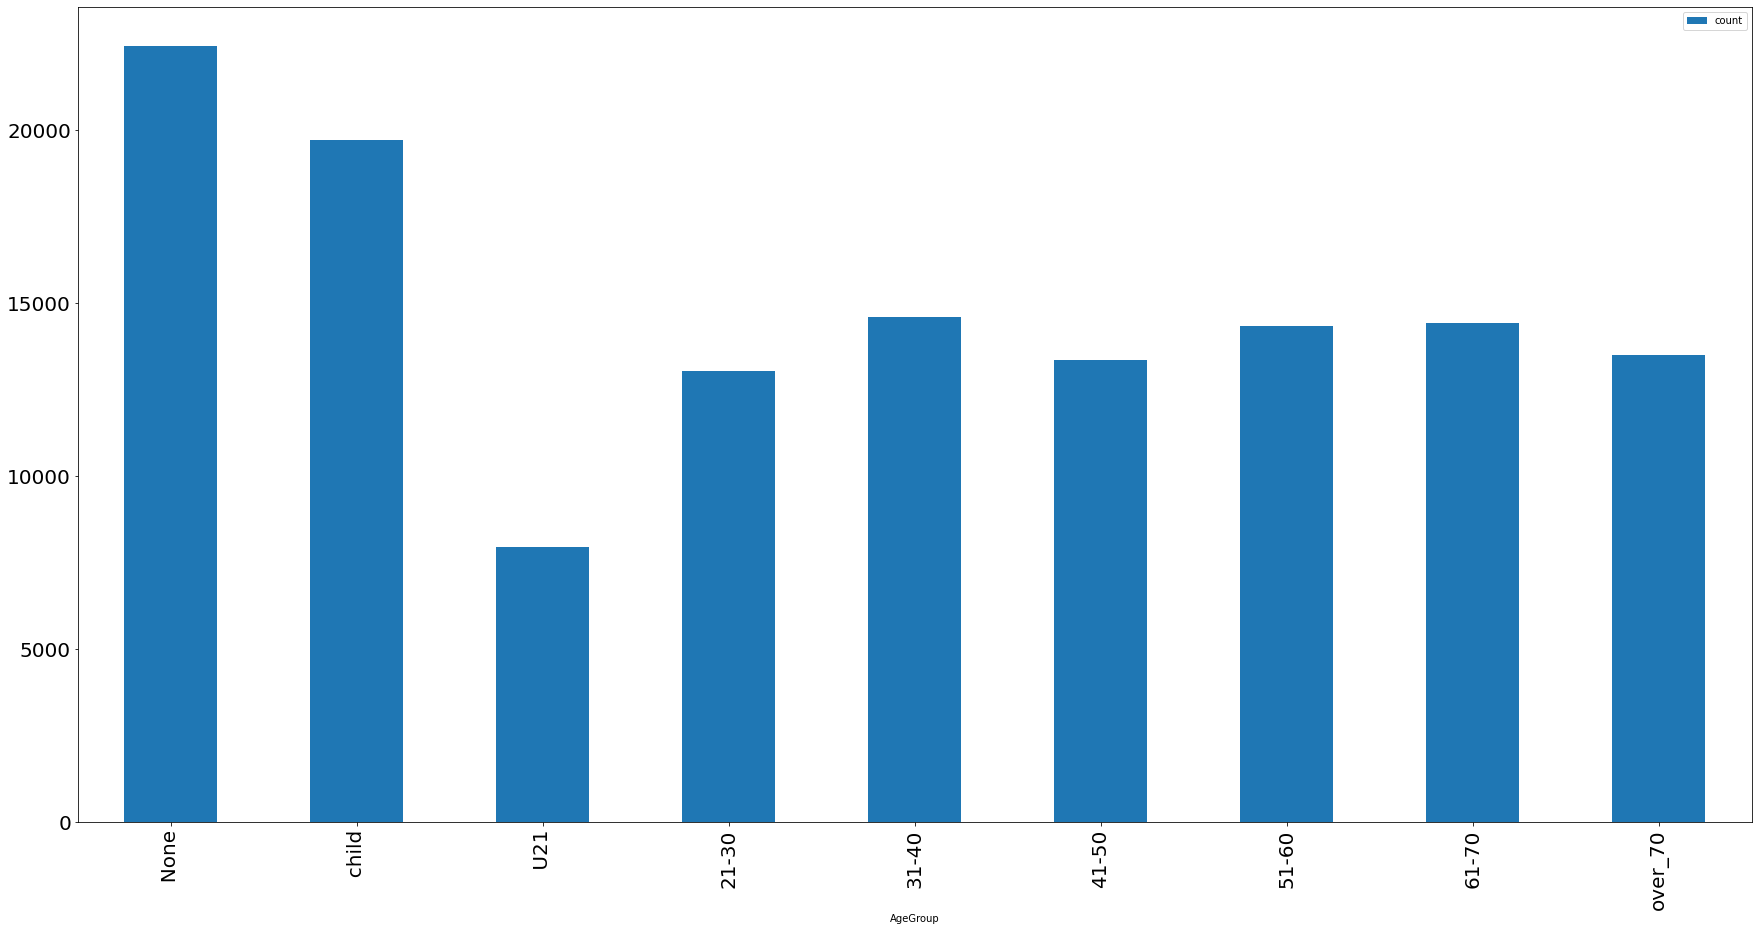

In [16]:
col_name = 'AgeGroup'
df = 'apr21_df'

spark.sql(ql(df, col_name)).show()
quick_plot(spark.sql(ql(df, col_name)).toPandas(), col_name)

In [6]:
query = '''SELECT 
                HEHOUSUT ,
                COUNT(HEHOUSUT) as count
            FROM apr21_df 
            GROUP BY 
                HEHOUSUT
            ORDER BY 
                HEHOUSUT
            '''
spark.sql(query).show()
df_hsg = spark.sql(query)

+--------+------+
|HEHOUSUT| count|
+--------+------+
|       1|126757|
|       2|    46|
|       3|    25|
|       4|   117|
|       5|  5067|
|       6|   762|
|       7|   122|
|       8|    20|
|      10|   243|
|      11|    12|
|      12|   278|
+--------+------+



In [8]:
import sys
print(sys.path)

['/home/jovyan/work/Capstones/DSI_Capstone_1', '/tmp/spark-076b50bb-dd6f-4875-815a-f638998aaaf1/userFiles-c0739bd4-1466-4cfb-b87c-b1b0f97a37bb', '/usr/local/spark/python/lib/py4j-0.10.9-src.zip', '/usr/local/spark/python', '/home/jovyan/work/Capstones/DSI_Capstone_1', '/opt/conda/lib/python39.zip', '/opt/conda/lib/python3.9', '/opt/conda/lib/python3.9/lib-dynload', '', '/opt/conda/lib/python3.9/site-packages', '/opt/conda/lib/python3.9/site-packages/IPython/extensions', '/home/jovyan/.ipython']


In [9]:
%who